# Homework 11

In [1]:
import numpy as np
import pandas as pd
import scipy 
import scipy.stats as st
import sys
from statsmodels.stats.proportion import proportions_ztest

import matplotlib
import matplotlib.pyplot as plt
import sprt

In [2]:
data = pd.read_csv('sadiev.aa.csv', header = None)
data.sample(5)

,0
4745,1
1410,0
4094,1
3441,1
3878,1


In [3]:
X = data.values
X.shape

(5000, 1)

## Вопрос 1

Оценка вероятности методом максимального правдоподобия.

In [4]:
p = X.sum()/len(X)
print('Оценка максимума правдоподобия p = {}'.format(round(p, 3)))

Оценка максимума правдоподобия p = 0.625


## Вопрос 2

С помощью последовательного анализа проверить нулевую гипотезу p0=0.5 против p1, полученной методом максимального правдоподобия. 

Decision:	Reject

      values     lower     upper
n                               
4991    3119  2804.496  2816.044
4992    3120  2805.059  2816.607
4993    3120  2805.622  2817.170
4994    3121  2806.185  2817.733
4995    3121  2806.749  2818.296
4996    3121  2807.312  2818.859
4997    3122  2807.875  2819.422
4998    3122  2808.438  2819.985
4999    3123  2809.001  2820.548
5000    3124  2809.564  2821.111


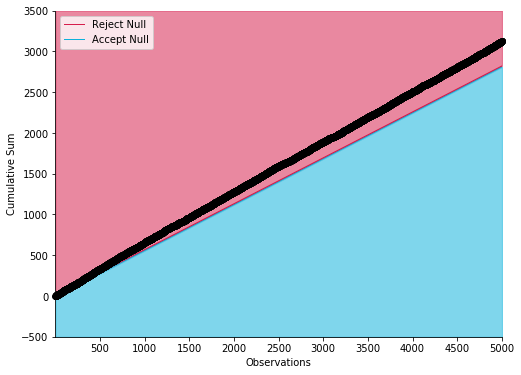

In [5]:
alpha = 0.05
beta =0.05

test = sprt.SPRTBinomial(alpha=alpha, beta=beta, h0=0.5, h1=p, values=X)
test.plot()

## Вопрос 3

Какое минимальное количество итераций требуется для вынесения решения по данной гипотезе?

Decision:	Reject

    values   lower   upper
n                         
61      40  28.573  40.121
62      40  29.136  40.684
63      41  29.700  41.247
64      41  30.263  41.810
65      41  30.826  42.373
66      42  31.389  42.936
67      43  31.952  43.499
68      44  32.515  44.062
69      45  33.078  44.625
70      46  33.641  45.188


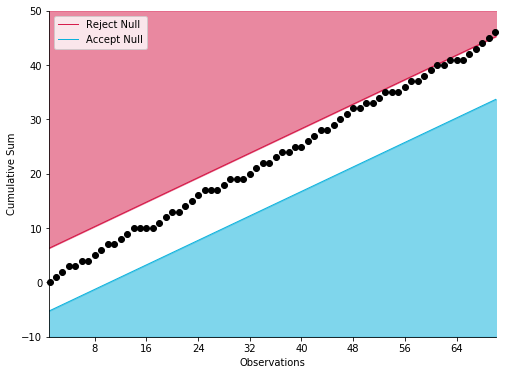

In [6]:
X_new = X[:70]
test = sprt.SPRTBinomial(alpha=alpha, beta=beta, h0=0.5, h1=p, values=X_new)
test.plot()

Как мы видим по двум графикам, гипотеза отклоняется за 69 итераций.

## Вопрос 4

Матождиание требуемого количества итераций (для решения уравнения со слайдов можно использовать `scipy.optimize.root_scalar`). За истинное значение параметра принимать МП-оценку. 

In [7]:
def expectation(p, p_0, alpha, beta, h):
    A = (1 - beta)/alpha
    B = beta/(1 - alpha)
    L = (A**h - 1)/(A**h - B**h)
    
    result = (L * np.log(B) + (1 - L) * np.log(A))/ (p * np.log(p/p_0) + (1 - p) * np.log((1 - p)/(1 - p_0)) )
    
    return result



In [8]:
p = X.sum()/len(X)
p_0 = 0.5
alpha = 0.05
beta = 0.05

def f(x):
    s = (1 - ((1 - p)/(1 - p_0))**x)/((p/p_0)**x - ((1 - p)/(1 - p_0))**x ) - p
    return s

sol = scipy.optimize.root_scalar(f, bracket=[-10, 10], method='brentq')
print('Pешение: \n{}'.format(sol))
h = sol.root
print('\n Математическое ожидание числа итераций: {}'.format(expectation(p, p_0, alpha, beta, h)))

Pешение: 
      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: -0.999999999999999

 Математическое ожидание числа итераций: 84.17529529757967
